---

# 2.6 Zeros of polynomials and Horner's method 

---

A polynomial of degree $n$ has the form
$$P(x)=P_n(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots +a_1x+a_0$$
where the $a_i$’s, called the coefficients of $P_n$ and $a_n\neq 0$. 

The problem is as follows: Find $x$ such that

$$P(x) = 0.$$

> ### Fundamental Theorem of Algebra
> If $P(x)$ is a polynomial of degree $n \ge 1$ with real or complex coefficients, 
>then $P(x) = 0$ has at least one ( possibly complex) root.

## Example: 
Determine all the zeros of the polynomial $P(x) = x^3 - 5x^2 + 17x - 13$.

Note that $P(1)=0.$

In [1]:
P(x) = x^3 - 5x^2 + 17x - 13

P (generic function with 1 method)

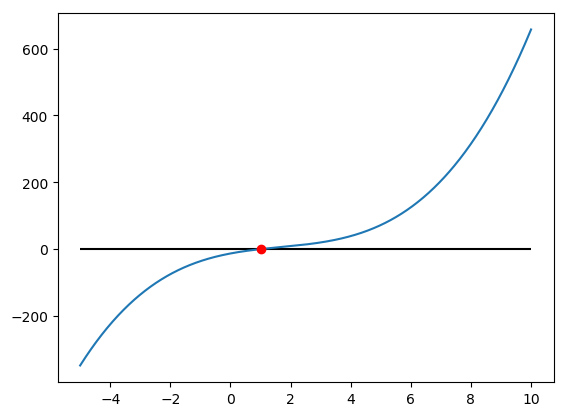

In [2]:
using PyPlot
x = linspace(-5, 10, 1000)
plot(x, P.(x))
hlines(0, -5, 10)
plot(1, 0, "ro")
#xlim(-5, 10);

## Horner's Method
To use Newton’s method, we need to evaluate $P(x)$ and $P^\prime(x)$ at specified values. 

Computational efficiency requires that the evaluation of polynomials be done in the **nested** manner discussed before. Horner’s (Ruffini) method incorporates this nesting technique, and, as a consequence, requires only $n$ multiplications and $n$ additions to evaluate an arbitrary $n$th-degree polynomial.

>## Theorem (Horner’s Method)
>Let $$P(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots +a_1x+a_0.$$
Define $b_n = a_n$ and
$$ b_k =a_k +b_{k+1}x_0,\qquad k=n−1,n−2,\ldots,1,0.$$
Then $b_0 = P(x_0)$. Moreover, if
$$Q(x)=b_nx^{n−1} +b_{n−1}x^{n−2} +\cdots+b_2x+b_1,$$
then $$P(x)=(x-x_0)Q(x)+b_0.$$

In [3]:
using Polynomials

In [4]:
? Polynomials

search: Polynomials



No documentation found.

Displaying the `README.md` for the module instead.

---

# Polynomials

Basic arithmetic, integration, differentiation, evaluation, and root finding over dense univariate polynomials.

[![Polynomials](http://pkg.julialang.org/badges/Polynomials_0.6.svg)](http://pkg.julialang.org/?pkg=Polynomials)

Master branch: [![Build Status](https://travis-ci.org/JuliaMath/Polynomials.jl.svg?branch=master)](https://travis-ci.org/JuliaMath/Polynomials.jl) [![Coverage Status](https://coveralls.io/repos/github/JuliaMath/Polynomials.jl/badge.svg)](https://coveralls.io/github/JuliaMath/Polynomials.jl)

Documentation: [![](https://img.shields.io/badge/docs-stable-blue.svg)](https://JuliaMath.github.io/Polynomials.jl/stable) [![](https://img.shields.io/badge/docs-latest-blue.svg)](https://JuliaMath.github.io/Polynomials.jl/latest)

#### Poly(a::Vector) where {T<:Number}

Construct a polynomial from its coefficients, lowest order first.

```julia
julia> Poly([1,0,3,4])
Poly(1 + 3x^2 + 4x^3)
```

An optional variable parameter can be added.

```julia
julia> Poly([1,2,3], :s)
Poly(1 + 2s + 3s^2)
```

#### poly(r::AbstractVector)

Construct a polynomial from its roots. This is in contrast to the `Poly` constructor, which constructs a polynomial from its coefficients.

```julia
// Represents (x-1)*(x-2)*(x-3)
julia> poly([1,2,3])
Poly(-6 + 11x - 6x^2 + x^3)
```

#### +, -, *, /, div, ==

The usual arithmetic operators are overloaded to work on polynomials, and combinations of polynomials and scalars.

```julia
julia> p = Poly([1,2])
Poly(1 + 2x)

julia> q = Poly([1, 0, -1])
Poly(1 - x^2)

julia> 2p
Poly(2 + 4x)

julia> 2+p
Poly(3 + 2x)

julia> p - q
Poly(2x + x^2)

julia> p * q
Poly(1 + 2x - x^2 - 2x^3)

julia> q / 2
Poly(0.5 - 0.5x^2)

julia> q ÷ p      # `div`, also `rem` and `divrem`
Poly(0.25 - 0.5x)
```

Note that operations involving polynomials with different variables will error.

```julia
julia> p = Poly([1, 2, 3], :x)
julia> q = Poly([1, 2, 3], :s)
julia> p + q
ERROR: Polynomials must have same variable.
```

To get the degree of the polynomial use the `degree` method

```
julia> degree(p)
1

julia> degree(p^2)
2

julia> degree(p-p)
0
```

#### polyval(p::Poly, x::Number)

Evaluate the polynomial `p` at `x`.

```julia
julia> p = Poly([1, 0, -1])
julia> polyval(p, 0.1)
0.99
```

A call method is also available:

```julia
julia> p(0.1)
0.99
```

#### polyint(p::Poly, k::Number=0)

Integrate the polynomial `p` term by term, optionally adding constant term `k`. The order of the resulting polynomial is one higher than the order of `p`.

```julia
julia> polyint(Poly([1, 0, -1]))
Poly(x - 0.3333333333333333x^3)

julia> polyint(Poly([1, 0, -1]), 2)
Poly(2.0 + x - 0.3333333333333333x^3)
```

#### polyder(p::Poly)

Differentiate the polynomial `p` term by term. The order of the resulting polynomial is one lower than the order of `p`.

```julia
julia> polyder(Poly([1, 3, -1]))
Poly(3 - 2x)
```

#### roots(p::Poly)

Return the roots (zeros) of `p`, with multiplicity. The number of roots returned is equal to the order of `p`. By design, this is not type-stable, the returned roots may be real or complex.

```julia
julia> roots(Poly([1, 0, -1]))
2-element Array{Float64,1}:
 -1.0
  1.0

julia> roots(Poly([1, 0, 1]))
2-element Array{Complex{Float64},1}:
 0.0+1.0im
 0.0-1.0im

julia> roots(Poly([0, 0, 1]))
2-element Array{Float64,1}:
 0.0
 0.0
```

#### Polyfit

  * `polyfit`: fits a polynomial of minimal degree fitting the points specified by `x` and `y` using the least-squares fit.

```julia
julia> xs = 1:4; ys = exp(xs); polyfit(xs, ys)
Poly(-7.717211620141281 + 17.9146616149694x - 9.77757245502143x^2 + 2.298404288652356x^3)
```

#### Other methods

Polynomial objects also have other methods:

  * 0-based indexing is used to extract the coefficients of $a_0 + a_1 x + a_2 x^2 + ...$, coefficients may be changed using indexing notation.
  * `coeffs`: returns the entire coefficient vector
  * `degree`: returns the polynomial degree, `length` is 1 plus the degree
  * `variable`: returns the polynomial symbol as a degree 1 polynomial
  * `norm`: find the `p`-norm of a polynomial
  * `conj`: finds the conjugate of a polynomial over a complex fiel
  * `truncate`: set to 0 all small terms in a polynomial; `chop` chops off any small leading values that may arise due to floating point operations.
  * `gcd`: greatest common divisor of two polynomials.
  * `Pade`: Return the [Pade approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant) of order `m/n` for a polynomial as a `Pade` object.

## See also

  * [MultiPoly.jl](https://github.com/daviddelaat/MultiPoly.jl) for sparse multivariate polynomials
  * [MultivariatePolynomials.jl](https://github.com/blegat/MultivariatePolynomials.jl) for multivariate polynomials and moments of commutative or non-commutative variables
  * [Nemo.jl](https://github.com/wbhart/Nemo.jl) for generic polynomial rings, matrix spaces, fraction fields, residue rings, power series
  * [PolynomialRoots.jl](https://github.com/giordano/PolynomialRoots.jl) for a fast complex polynomial root finder


In [5]:
Poly([-13,17,-5,1])

Poly(-13 + 17*x - 5*x^2 + x^3)

In [6]:
roots(Poly([1, -5, 17, -13]))

3-element Array{Complex{Float64},1}:
      1.0+0.0im     
 0.153846+0.230769im
 0.153846-0.230769im

In [7]:
p = Poly([1, -5, 17, -13])
polyval(p, -0.1)

1.683

In [8]:
function horner(coefs, x)
    s = copy(coefs[end])
    for k in length(coefs)-1:-1:1
        s = copy(coefs[k]) + x * s  # b_k = a_k + x_0*b_{k+1}
    end
    return s
end

horner (generic function with 1 method)

In [9]:
Poly([1, -5, 17, -13])

Poly(1 - 5*x + 17*x^2 - 13*x^3)

In [10]:
horner([1, -5, 17, -13], -0.1)

1.683

In [11]:
# We are beating JULIA!!!
coefs=rand(1000001)
p = Poly(coefs)
x0=-0.2345
@time polyval(p, x0)
@time p(x0)
@time horner(coefs, x0)

  0.018490 seconds (3.84 k allocations: 215.779 KiB)
  0.007126 seconds (130 allocations: 8.828 KiB)
  0.014899 seconds (2.31 k allocations: 128.214 KiB)


-0.07427507055456554

## Example: 
Use Horner's method to evaluate
$$P(x) = 2x^4 − 3x^2 + 3x − 4 \qquad \mbox{at}\quad x_0 = −2.$$

An additional advantage of using the Horner  procedure is that, since
$$P(x) = (x − x_0)Q(x) + b_0,$$ 

$$P^\prime(x)=Q(x)+(x−x )Q^\prime(x)\qquad \mbox{and} \qquad
P^\prime(x_0)=Q(x_0).$$

When the Newton's method is being used to find an approximate zero of a polynomial, $P(x)$ and $P^\prime(x)$ can be evaluated.

In [12]:
function hornerVect(coefs, x)
    coefsnew = copy(coefs)
    for k in length(coefs)-1:-1:1
        coefsnew[k] = copy(coefs[k]) + x * coefsnew[k+1]  # b_k = a_k + x_0*b_{k+1}
    end
    return coefsnew
end

hornerVect (generic function with 1 method)

In [13]:
p = Poly([-4,3, -3,0, 2])
b=hornerVect([-4,3, -3,0, 2],-2)

5-element Array{Int64,1}:
 10
 -7
  5
 -4
  2

In [14]:
b[1]

10

In [15]:
p(-2)

10

In [16]:
q = Poly(b[2:length(b)])

Poly(-7 + 5*x - 4*x^2 + 2*x^3)

In [17]:
d = horner(b[2:length(b)],-2)

-49

In [18]:
q(-2)

-49

In [19]:
using PyPlot
function plotnewtonH(p,q, x0, a, b; tol=1e-6, maxiter=10)    
    xspan = linspace(a, b, 1000)
    plot(xspan, p.(xspan), "b")
    hlines(0, a, b)
    xlim(a, b)    
    k = 0
    x = x0
    px = p(x)
    #q=polyder(p)
    #qx = q(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "p(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - px/q(x)
        vlines(x, 0, px, linestyles=":")
        plot([xnew, x], [0, px], "r")
        plot(x, px, "bo")
        xold = x
        x = xnew
        px = p(x)
        #qx = q(x)
        @printf "%4d %22.15e %22.15e\n" k x px
    end  
    return x  
end

plotnewtonH (generic function with 1 method)

In [20]:
p=Poly([-4,3, -3,0, 2])

Poly(-4 + 3*x - 3*x^2 + 2*x^4)

In [21]:
q=polyder(p)

Poly(3 - 6*x + 8*x^3)

   k                      x                   p(x)


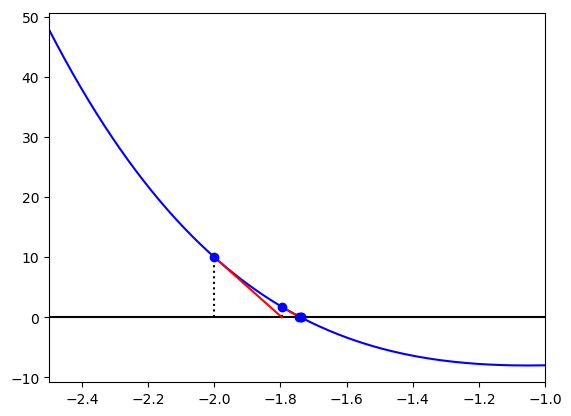

   1 -1.795918367346939e+00  1.741690649859379e+00
   2 -1.742432916750542e+00  9.995592022432565e-02
   3 -1.738970235336167e+00  4.002870896355759e-04
   4 -1.738956256679049e+00  6.504574656673867e-09
   5 -1.738956256451892e+00  8.881784197001252e-16


-1.738956256451892

In [22]:
x = plotnewtonH(p,q, -2.0, -2.5, -1)

In [23]:
roots(p)

4-element Array{Complex{Float64},1}:
 -1.73896+0.0im     
  1.25488+0.0im     
 0.242037+0.926245im
 0.242037-0.926245im

In [24]:
using Polynomials
function newtonH(pcoefs, x0; tol=1e-6, maxiter=10)   
    k=0
    @printf "%4s %22s %22s  %22s\n" "k" "x" "p(x)" "q(x)" 
    x = x0
    p=Poly(pcoefs)
    q=polyder(p)
    px = p(x)
    qx = q(x)   
    xold, xnew = x, Inf
    @printf "%4d %22.15e %22.15e\n" k x px 
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - px/qx
        xold = x
        x = xnew
        px = p(x)
        qx = q(x) 
        @printf "%4d %22.15e %22.15e\n" k x px 
    end  
    return x  
end

newtonH (generic function with 1 method)

In [25]:
a=[-10,0, 1]
newtonH(a, 20)

   k                      x                   p(x)                    q(x)
   0  2.000000000000000e+01  3.900000000000000e+02
   1  1.025000000000000e+01  9.506250000000000e+01
   2  5.612804878048781e+00  2.150357859904819e+01
   3  3.697222645433951e+00  3.669455289909621e+00
   4  3.200977809537825e+00  2.462589371535735e-01
   5  3.162511604551991e+00  1.479648926011379e-03
   6  3.162277668821308e+00  5.472592690125566e-08
   7  3.162277660168380e+00  1.776356839400250e-15


3.1622776601683795

## An application: Minimizing a function in one variable

We can use the root-finding methods described above to find the **minimum** or **maximum** value of a function $\phi \in C^2[a,b]$.

Recall that $x^* \in (a,b)$ is a **critical point** of $\phi$ if 

$$\phi'(x^*) = 0.$$

We can find $x^*$ by applying Newton's method to this nonlinear equation to obtain:

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

## Another interpretation for Newton's method

We can also obtain this by considering the **second-order (quadratic) approximation** of $\phi$ around the point $x_k$:

$$\phi(x) \approx \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2, \quad \text{for all $x \approx x_k$}.$$

If $x_k$ is close to $x^*$, we expect the minimum/maximum of $\phi$ to be near the minimum/maximum of the **quadratic approximation** of $\phi$:

$$q(x) = \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2.$$

Thus we should choose $x_{k+1}$ to be the critical point of $q$, so we want to find $x_{k+1}$ such that $q'(x_{k+1}) = 0$. Note that

$$q'(x) = \phi'(x_k) + \phi''(x_k)(x-x_k).$$

Thus $q'(x_{k+1}) = 0$ gives us

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

---

## Example

Let's find the minimum value of 

$$\phi(x) = 10\cosh(x/4) - x$$

by applying Newton's method.

In [26]:
using PyPlot

function plotnewton(f, fp, x0, a, b; tol=1e-6, maxiter=10)
    
    xspan = linspace(a, b, 1000)
    plot(xspan, f.(xspan), "b")
    hlines(0, a, b)
    xlim(a, b)
    
    k = 0
    x = x0
    fx = f(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "f(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - fx/fp(x)
        
        # Plotting stuff
        vlines(x, 0, fx, linestyles=":")
        plot([xnew, x], [0, fx], "r")
        plot(x, fx, "bo")
        
        xold = x
        x = xnew
        fx = f(x)
        @printf "%4d %22.15e %22.15e\n" k x fx
    end
    
    return x
    
end

plotnewton (generic function with 1 method)

In [27]:
ϕ(x) = 10cosh(x/4) - x

ϕ (generic function with 1 method)

In [28]:
ϕp(x) = 2.5sinh(x/4) - 1

ϕp (generic function with 1 method)

In [29]:
ϕpp(x) = 0.625cosh(x/4)

ϕpp (generic function with 1 method)

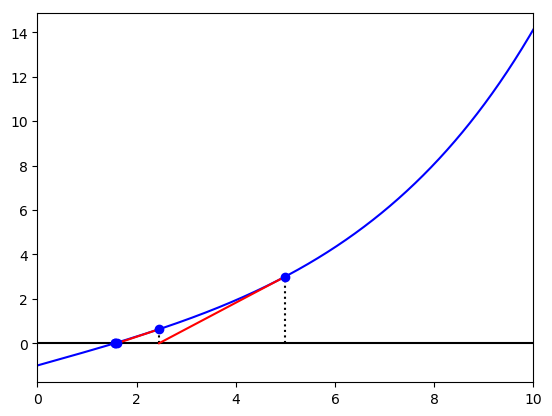

 k                      x                   f(x)
   1  2.454132846259612e+00  6.318888130288225e-01
   2  1.607515395183571e+00  3.196055878741744e-02
   3  1.560247213739166e+00  7.130979857405961e-05
   4  1.560141279603856e+00  3.507054646689767e-10
   5  1.560141279082861e+00 -1.110223024625157e-16


1.560141279082861

In [30]:
x0, a, b = 5., 0., 10.

x = plotnewton(ϕp, ϕpp, x0, a, b)

In [31]:
ϕpp(x)

0.673145600891813

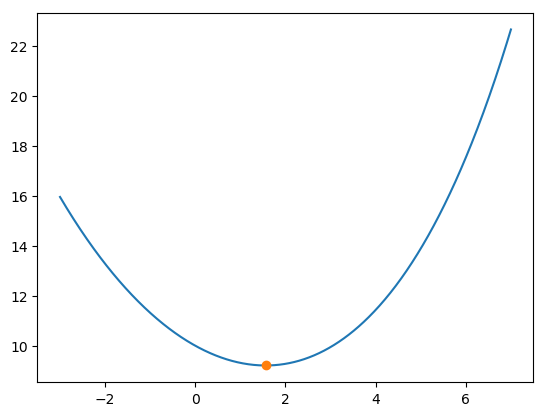

In [32]:
xspan = linspace(-3, 7, 1000)

plot(xspan, ϕ.(xspan))
plot(x, ϕ(x), "o");

Thus 

$$x^* = 1.560141279082861\ldots.$$ 

Note that $\phi'(x^*) = 0$, as required. Since $\phi''(x^*) > 0$, we know that 

$$\phi(x^*) = 9.210188335186146\ldots$$ 

is a **local minimum value** of $\phi$.

In fact, since $\phi''(x) > 0$ for all $x$, we know that $\phi(x^*)$ is the **global minimum value** of $\phi$.

---